# Линейная регрессия
__Суммарное количество баллов: 10__

__Решение отправлять на `ml.course.practice@gmail.com`__

__Тема письма: `[ML][MS][HW03] <ФИ>`, где вместо `<ФИ>` указаны фамилия и имя__

In [339]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
from sklearn.preprocessing import normalize

In [340]:
def read_data(path="boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    np.random.seed(42)
    np.random.shuffle(dataframe)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [341]:
def generate_synthetic(size:int, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Также чтобы оценить качество модели нам понадобится метрика $R^2$. Реализуйте обе эти метрики.

In [342]:
def mse(y_true:np.ndarray, y_predicted:np.ndarray):
    y_true = y_true.reshape(-1,1)
    y_predicted = y_predicted.reshape(-1, 1)
    dif = y_true - y_predicted
    return np.mean(dif*dif)

def r2(y_true:np.ndarray, y_predicted:np.ndarray):
    y_true = y_true.reshape(-1,1)
    y_predicted = y_predicted.reshape(-1, 1)
    y_mean = np.mean(y_true)
    dif_TSS = y_true - y_mean 
    TSS = sum(dif_TSS * dif_TSS)
    dif_RSS = y_true - y_predicted 
    RSS = sum(dif_RSS * dif_RSS)    
    ans= 1 - RSS/TSS
    return ans[0]

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [343]:
class NormalLR:
    def __init__(self):
        pass
    
    def fit(self, X:np.ndarray, y:np.ndarray):
        v_1 = np.full((np.shape(X)[0], 1), 1.) 
        X = np.concatenate((v_1, X), axis=1)
        self.w = np.linalg.inv(X.T @ X)@ X.T @ y
    
    def predict(self, X:np.ndarray) -> np.ndarray:
        v_1 = np.full((np.shape(X)[0], 1), 1.) 
        X = np.concatenate((v_1, X), axis=1)        
        return X @ self.w

In [344]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

/Users/margaritatsobenko/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [345]:
regr = NormalLR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: 0.012888145062162666, R2: 0.9992528048725882


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций. В задании необходимо использовать регуляризацию Лассо с коэффициентом `l`.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

In [346]:
class GradientLR:
    def __init__(self, alpha:float, iterations=10000, l=0.):
        self.alpha = alpha
        self.iterations = iterations
        self.l = l
        
    def oracle_1(self, X,y,  w):
        return 2 * X.T @ (X @ w - y) / X.shape[0] + self.l * np.sign(w)
    
    def fit(self, X:np.ndarray, y:np.ndarray):
        v_1 = np.full((np.shape(X)[0], 1), 1.) 
        X = np.concatenate((v_1, X), axis=1) 
        y = y.reshape(-1, 1)
        n = np.shape(X)[1]
        self.w = np.random.sample((n,1))
        
        for i in range(self.iterations):
            self.w = self.w - self.alpha*self.oracle_1(X, y, self.w)

    def predict(self, X:np.ndarray):
        v_1 = np.full((np.shape(X)[0], 1), 1.) 
        X = np.concatenate((v_1, X), axis=1)        
        return X @ self.w

In [347]:
def build_plot(X_train, y_train, X_test, y_test):
    xs = np.arange(0.0, 0.002, 0.00002)
    errors = []
    for x in xs:
        regr = GradientLR(0.1, iterations=10000, l=x)
        regr.fit(X_train, y_train)
        errors.append(mse(y_test, regr.predict(X_test)))
    plt.figure(figsize=(9, 4))
    plt.xlim(xs[0], xs[-1])
    plt.grid()
    plt.plot(xs, errors)
    plt.show()

In [348]:
X, y = generate_synthetic(1024)
X, X_val, y, y_val = train_test_split(X, y, train_size=0.9, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

/Users/margaritatsobenko/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


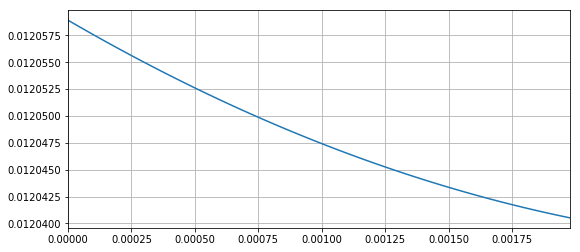

In [349]:
build_plot(X_train, y_train, X_val, y_val)

In [350]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: 0.011587652876773899, R2: 0.9993438576334326


### Задание 4 (2 балла)
Протесируйте оба метода на данных `boston.csv`, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [351]:
X, y = read_data()
y = y.reshape(-1,1)
X, y = normalize(X, axis=0, norm='max'), normalize(y, axis=0, norm='max')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

/Users/margaritatsobenko/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [352]:
regr = NormalLR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: 0.00890652443233495, R2: 0.6872797475660983


In [353]:
X, y = read_data()
y = y.reshape(-1,1)
X, y = normalize(X, axis=0, norm='max'), normalize(y, axis=0, norm='max')

In [354]:
X, X_val, y, y_val = train_test_split(X, y, train_size=0.9, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

/Users/margaritatsobenko/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


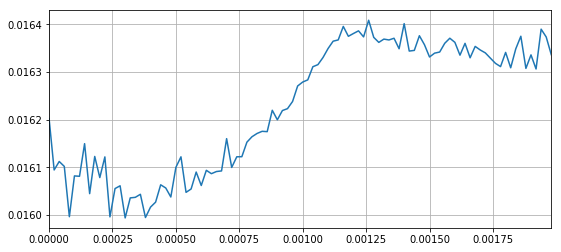

In [355]:
build_plot(X_train, y_train, X_val, y_val)

In [356]:
regr = GradientLR(0.1, iterations=10000, l=0.0002)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: 0.008265389046310715, R2: 0.6431589096124928


### Задание 5 (2 балла)
Проинтерпритируйте полученные результаты. Опишите влияние каждого признака на результат предсказания.

Посмотрим на получившиеся веса.

In [357]:
regr.w.T

array([[ 0.63088044, -0.14290255,  0.09683888,  0.00584151,  0.03750523,
        -0.23552057,  0.72409528, -0.00347976, -0.33595669,  0.08977277,
        -0.12856793, -0.39762864,  0.06119891, -0.41627115]])

На первый вес не смотрим, потому что он соответствует свободному члену. Положительные и отрицательные веса влияют на то, прибавляется или снижается цена квартиры, в зависимости от признака. 

Судя по весам, самый большой положительный вклад вносит признак rm, что понятно, потому что стоимость дома напрямую зависит от того, сколько комнат в доме. А самый большой отрицательный вклад вносит признак lstat. Признак nitric oxides concentration снижает стоимость на дом, как и признак b и признак ptratio (количество детей на 1 учителя).

Все остальные признаки тоже вносят свои + и -, но уже не так сильно, как описанные выше.